In [2]:
import pandas as pd          # data manipulation, reading CSV
import numpy as np           # numerical computations
import matplotlib.pyplot as plt   # plotting
import seaborn as sns             # prettier statistical plots
from datetime import datetime     # working with dates
import matplotlib.dates as mdates # formatting date plots


In [3]:
#Import & inspect first 5 records of the data
df = pd.read_csv("finalcombined.csv")
df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,aka_title,region,language,...,domestic_gross,worldwide_gross,production_budget_num,domestic_gross_num,worldwide_gross_num,domestic_ratio,worldwide_ratio,profit_num,roi_num,domestic_pct
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,A Origem,BR,Unknown,...,"$292,576,195","$835,524,642",160000000.0,292576195.0,8.355246e+08,1.828601,5.222029,6.755246e+08,4.222029,35.017064
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0,A sötét lovag: Felemelkedés,HU,Unknown,...,"$448,139,099","$1,084,439,099",275000000.0,448139099.0,1.084439e+09,1.629597,3.943415,8.094391e+08,2.943415,41.324506
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,Bein kokhavim,IL,he,...,"$188,017,894","$666,379,375",165000000.0,188017894.0,6.663794e+08,1.139502,4.038663,5.013794e+08,3.038663,28.214843
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0,Django,PL,Unknown,...,"$162,805,434","$449,948,323",100000000.0,162805434.0,4.499483e+08,1.628054,4.499483,3.499483e+08,3.499483,36.183141
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,Angaarey Bane Sholey,IN,hi,...,"$623,279,547","$1,517,935,897",225000000.0,623279547.0,1.517936e+09,2.770131,6.746382,1.292936e+09,5.746382,41.060993


In [4]:
#Inspect the data
df.shape

(1652, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               1652 non-null   object 
 1   primary_title          1652 non-null   object 
 2   start_year             1652 non-null   int64  
 3   runtime_minutes        1652 non-null   float64
 4   genres                 1652 non-null   object 
 5   averagerating          1652 non-null   float64
 6   numvotes               1652 non-null   float64
 7   aka_title              1652 non-null   object 
 8   region                 1652 non-null   object 
 9   language               1652 non-null   object 
 10  log_numVotes           1652 non-null   float64
 11  runtime_winsorized     1652 non-null   float64
 12  tmdb_match             1652 non-null   object 
 13  Unnamed: 0             1652 non-null   int64  
 14  genre_ids              1652 non-null   object 
 15  id_n

In [6]:
#Missing values per column
print(df.isnull().sum())

movie_id                  0
primary_title             0
start_year                0
runtime_minutes           0
genres                    0
averagerating             0
numvotes                  0
aka_title                 0
region                    0
language                  0
log_numVotes              0
runtime_winsorized        0
tmdb_match                0
Unnamed: 0                0
genre_ids                 0
id_numbers                0
original_language         0
original_title            0
popularity                0
title                     0
vote_average              0
vote_count                0
release_year              0
log_popularity            0
combined_score            0
movie_name_match          0
id_imdb/tmdb              0
release_date              0
movie                     0
production_budget         0
domestic_gross            0
worldwide_gross           0
production_budget_num     0
domestic_gross_num        0
worldwide_gross_num       0
domestic_ratio      

In [7]:
#Summary statistics for numeric columns
print(df.describe())

        start_year  runtime_minutes  averagerating      numvotes  \
count  1652.000000      1652.000000    1652.000000  1.652000e+03   
mean   2013.788136       108.270581       6.400484  1.218517e+05   
std       2.502796        17.042080       0.943748  1.620861e+05   
min    2010.000000        63.000000       1.600000  1.031000e+03   
25%    2012.000000        95.000000       5.800000  2.369125e+04   
50%    2014.000000       106.000000       6.400000  6.638250e+04   
75%    2016.000000       118.000000       7.100000  1.533110e+05   
max    2019.000000       192.000000       8.800000  1.841066e+06   

       log_numVotes  runtime_winsorized    Unnamed: 0     id_numbers  \
count   1652.000000         1652.000000   1652.000000    1652.000000   
mean      10.959309          108.235472  11083.932203  193560.668281   
std        1.354134           16.844416   7500.293025  136338.018199   
min        6.939254           74.000000      0.000000     189.000000   
25%       10.072902        

In [8]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


**Exploratory Data Analysis (EDA)**

In [9]:
# What % of movies are profitable?
profitable_pct = (df['profit_num'] > 0).mean() * 100
print(f"Profitable movies: {profitable_pct:.1f}%")

Profitable movies: 75.1%


/tmp/ipykernel_18161/1225721247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


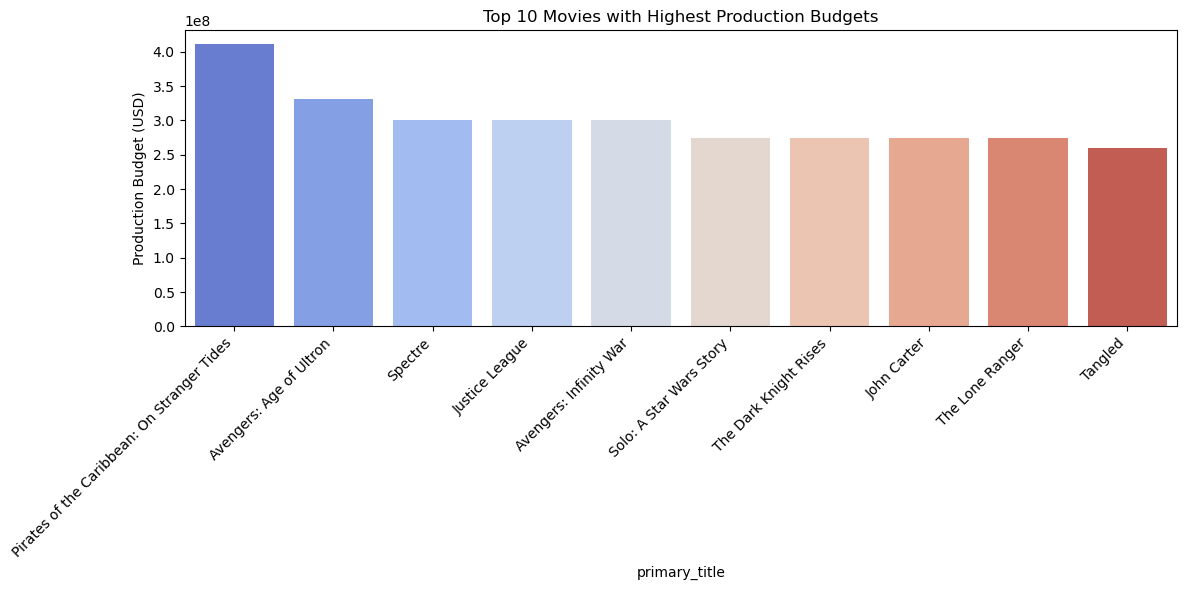

In [10]:
# Top 10 movies with highest production budget
top10_budget = (
    df[['primary_title', 'release_year', 'production_budget_num']]
    .sort_values(by='production_budget_num', ascending=False)
    .head(10)
)

# Create a bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_budget,
    x="primary_title",
    y="production_budget_num",
    palette="coolwarm"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Production Budget (USD)")
plt.title("Top 10 Movies with Highest Production Budgets")
plt.tight_layout()
plt.show()

/tmp/ipykernel_18161/2475309854.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


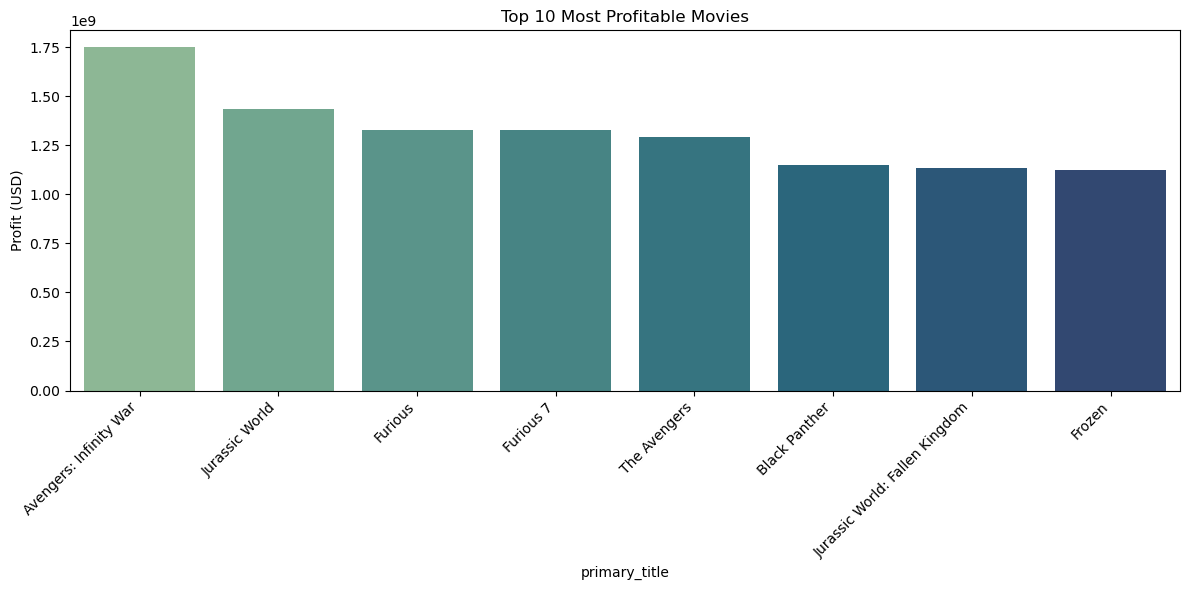

In [11]:
# Select top 10 by profit
top10_profit = (
    df[['primary_title', 'release_year', 'genres', 'profit_num']]
    .sort_values(by='profit_num', ascending=False)
    .head(10)
)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_profit,
    x="primary_title",
    y="profit_num",
    palette="crest"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Profit (USD)")
plt.title("Top 10 Most Profitable Movies")
plt.tight_layout()
plt.show()

   release_year      median          mean
0          2010  31566967.0  9.921173e+07
1          2011  22237142.5  7.480902e+07
2          2012  31239258.0  1.199557e+08
3          2013  28680687.5  1.011923e+08
4          2014  29160316.0  1.090968e+08


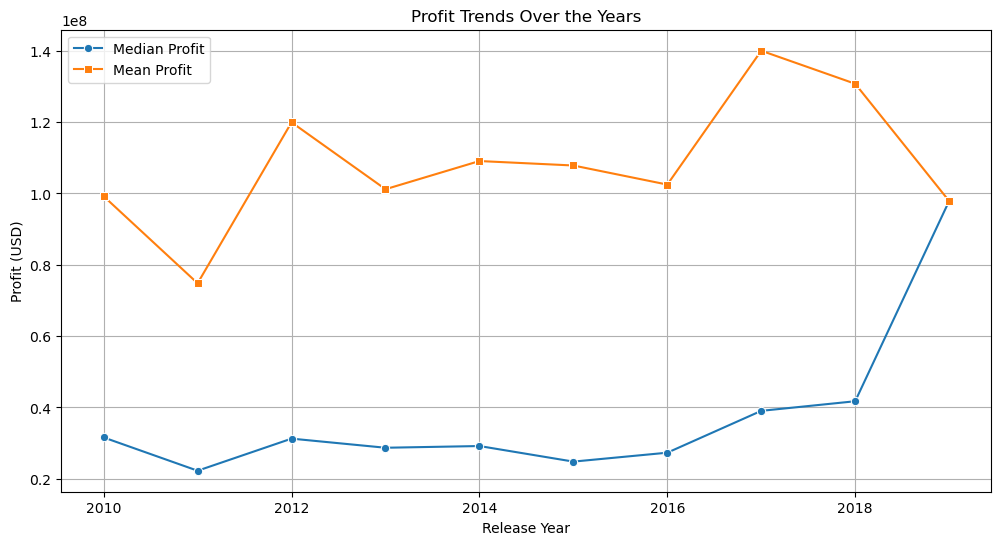

In [12]:
# Group by release year and calculate median & mean profit
profit_trend = df.groupby('release_year')['profit_num'].agg(['median', 'mean']).reset_index()

print(profit_trend.head())

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_trend, x="release_year", y="median", label="Median Profit", marker="o")
sns.lineplot(data=profit_trend, x="release_year", y="mean", label="Mean Profit", marker="s")

plt.title("Profit Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Profit (USD)")
plt.legend()
plt.grid(True)
plt.show()

Top Genres by Popularity:
                      genres  popularity
0  Adventure,Fantasy,Mystery   33.533000
1          Adventure,Fantasy   29.277000
2       Drama,Family,Fantasy   29.056000
3      Action,Mystery,Sci-Fi   28.043000
4     Adventure,Drama,Sci-Fi   25.648000
5    Action,Adventure,Sci-Fi   25.618804
6   Adventure,Mystery,Sci-Fi   24.980000
7    Action,Adventure,Comedy   24.457360
8         Action,Fantasy,War   23.680000
9   Action,Adventure,Fantasy   22.693553


/tmp/ipykernel_18161/2145422498.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


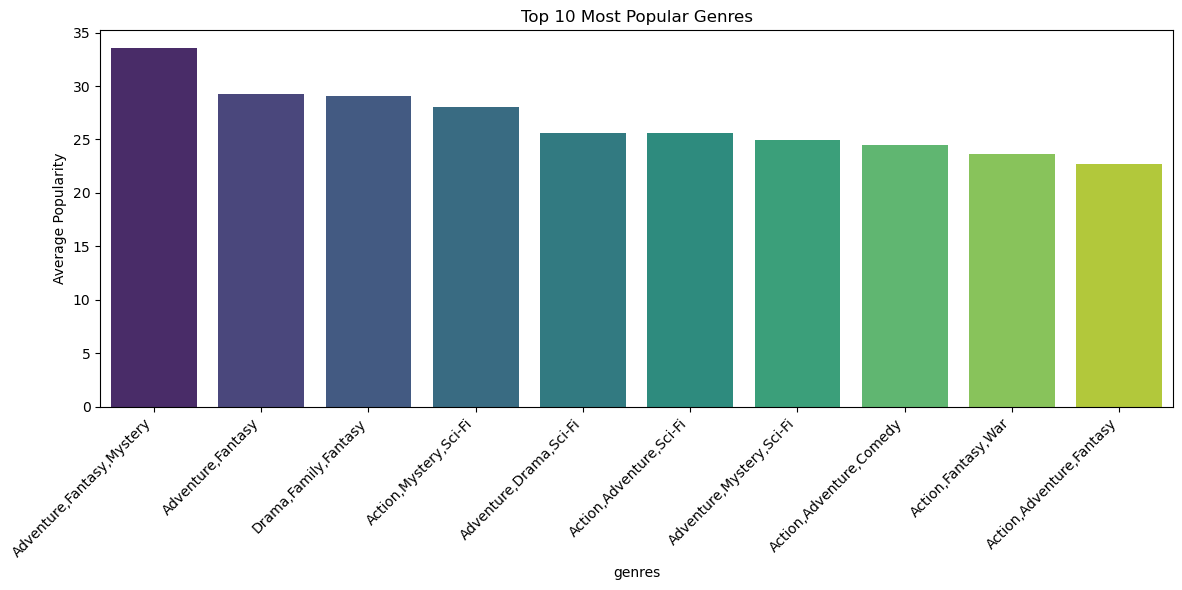

In [13]:
## Group by genre and calculate average popularity
genre_popularity = (
    df.groupby('genres')['popularity']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print("Top Genres by Popularity:")
print(genre_popularity.head(10))

# Plot top 10 genres
plt.figure(figsize=(12,6))
sns.barplot(
    data=genre_popularity.head(10),
    x="genres",
    y="popularity",
    palette="viridis"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Popularity")
plt.title("Top 10 Most Popular Genres")
plt.tight_layout()
plt.show()

Bottom Genres by Popularity:
                         genres  popularity
0              Comedy,Music,War       5.203
1         Drama,History,Mystery       6.056
2            Drama,Family,Sport       6.080
3            Crime,Drama,Sci-Fi       6.182
4             Documentary,Drama       6.202
5       Comedy,Fantasy,Thriller       6.495
6  Biography,Documentary,Family       6.682
7        Animation,Comedy,Crime       6.906
8    Adventure,Biography,Comedy       6.935
9         Adventure,Crime,Drama       7.179


/tmp/ipykernel_18161/778092262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


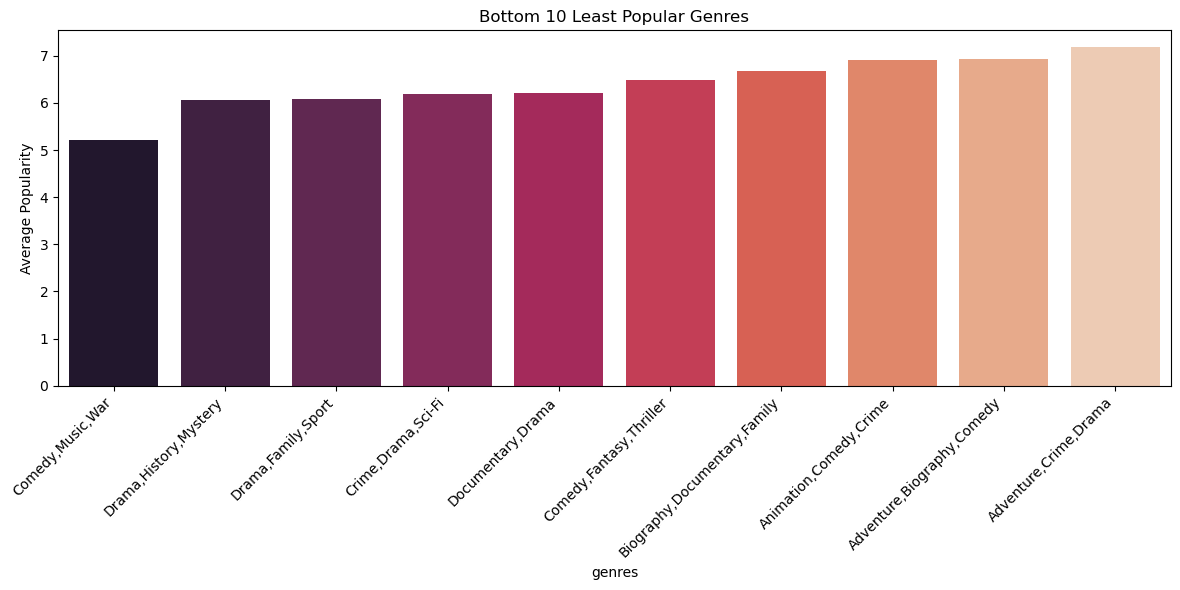

In [14]:
# Group by genre and calculate average popularity
genre_popularity = (
    df.groupby('genres')['popularity']
    .mean()
    .sort_values(ascending=True)   # sort ascending for least popular
    .reset_index()
)

print("Bottom Genres by Popularity:")
print(genre_popularity.head(10))

# Plot bottom 10 genres
plt.figure(figsize=(12,6))
sns.barplot(
    data=genre_popularity.head(10),
    x="genres",
    y="popularity",
    palette="rocket"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Popularity")
plt.title("Bottom 10 Least Popular Genres")
plt.tight_layout()
plt.show()

   release_year          mean      median
0          2010  5.030625e+07  30000000.0
1          2011  4.187276e+07  26500000.0
2          2012  4.781881e+07  26000000.0
3          2013  4.816456e+07  25000000.0
4          2014  4.050141e+07  20000000.0


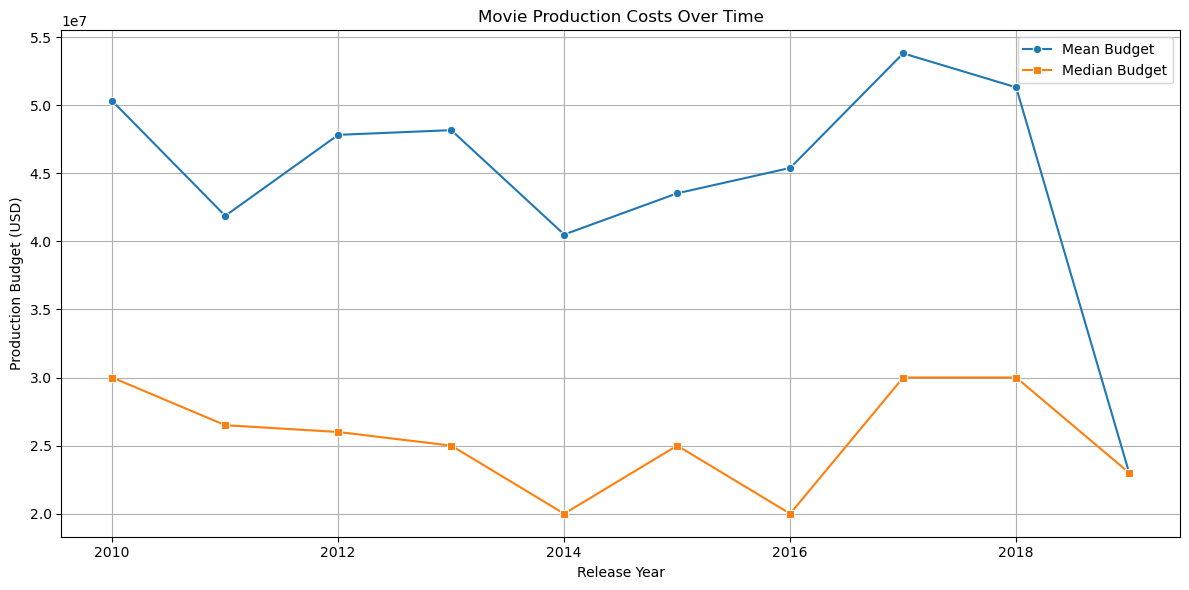

In [15]:
# Group by release year and calculate mean & median production budget
budget_trend = df.groupby('release_year')['production_budget_num'].agg(['mean', 'median']).reset_index()

print(budget_trend.head())

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=budget_trend, x="release_year", y="mean", label="Mean Budget", marker="o")
sns.lineplot(data=budget_trend, x="release_year", y="median", label="Median Budget", marker="s")

plt.title("Movie Production Costs Over Time")
plt.xlabel("Release Year")
plt.ylabel("Production Budget (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

   release_year          mean      median
0          2010  9.921173e+07  31566967.0
1          2011  7.480902e+07  22237142.5
2          2012  1.199557e+08  31239258.0
3          2013  1.011923e+08  28680687.5
4          2014  1.090968e+08  29160316.0


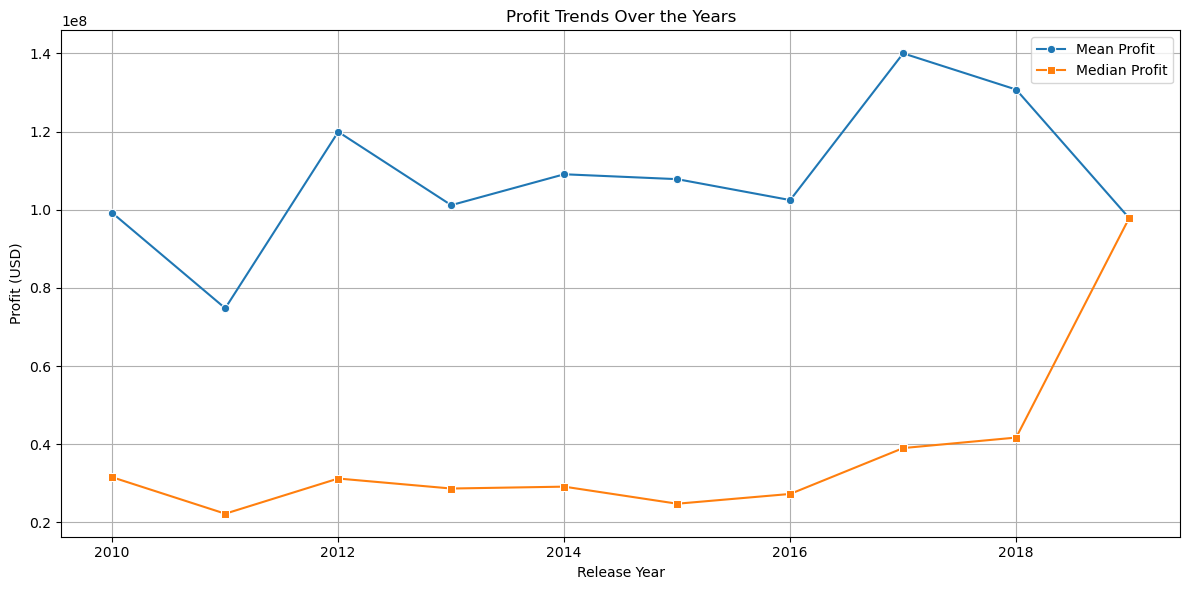

In [16]:
# Group by release year and calculate mean & median profit
profit_trend = df.groupby('release_year')['profit_num'].agg(['mean', 'median']).reset_index()

print(profit_trend.head())

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_trend, x="release_year", y="mean", label="Mean Profit", marker="o")
sns.lineplot(data=profit_trend, x="release_year", y="median", label="Median Profit", marker="s")

plt.title("Profit Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Profit (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

GENERAL OVERVIEW OF THE MOVIE INDUSTRY

In [17]:
# Ensure profit column exists
df["profit"] = df["gross"] - df["budget"]

# 1. Percentage of profitable movies
profitable_ratio = (df["profit"] > 0).mean() * 100

# 2. Average profit
avg_profit = df["profit"].mean()

# 3. One-sample t-test: H0: mean profit = 0, H1: mean profit > 0
t_stat, p_val = stats.ttest_1samp(df["profit"], 0)

print(f"✅ Percentage of profitable movies: {profitable_ratio:.2f}%")
print(f"✅ Average profit: ${avg_profit:,.0f}")
print(f"✅ One-sample t-test: t = {t_stat:.3f}, p = {p_val:.5f}")

# Business decision
if p_val/2 < 0.05 and t_stat > 0:  # one-tailed test
    print("Conclusion: Movies are significantly profitable (mean profit > 0 at 95% confidence).")
else:
    print("Conclusion: We cannot confirm the movie industry is significantly profitable.")


KeyError: 'gross'

In [ ]:
#Comparison of production budget vs profitability

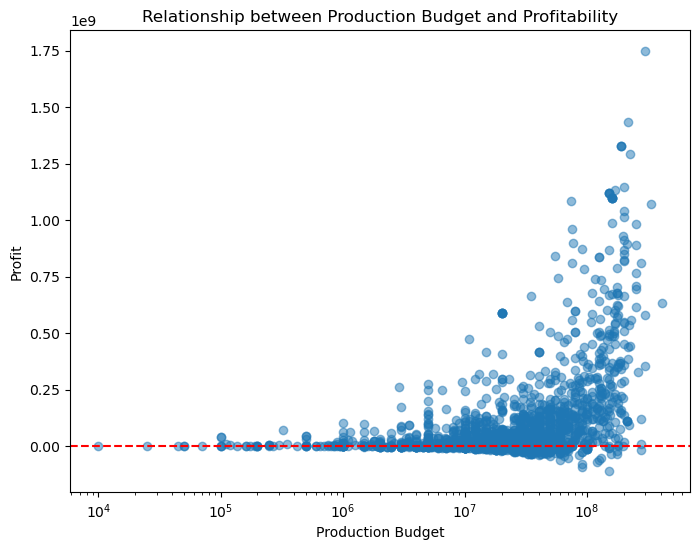

Correlation = 0.643, p-value = 1.11e-193


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load data
df = pd.read_csv("finalcombined.csv")

# Convert to numeric
df["budget"] = pd.to_numeric(df["production_budget"].astype(str).str.replace(r'[\$,]', '', regex=True), errors="coerce")
df["gross"] = pd.to_numeric(df["worldwide_gross"].astype(str).str.replace(r'[\$,]', '', regex=True), errors="coerce")

# Calculate profit
df["profit"] = df["gross"] - df["budget"]

# Drop missing values
df_clean = df.dropna(subset=["budget", "profit"])

# 🔹 Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_clean["budget"], df_clean["profit"], alpha=0.5)
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.title("Relationship between Production Budget and Profitability")
plt.xscale("log")   # optional (budgets vary a lot)
plt.axhline(0, color="red", linestyle="--")
plt.show()

# 🔹 Correlation test
corr, pval = pearsonr(df_clean["budget"], df_clean["profit"])
print(f"Correlation = {corr:.3f}, p-value = {pval:.3g}")


In [19]:
#There is colleration between budget and profitability however it is not a strong correlation  p-value<0.05

In [20]:
import pandas as pd
import numpy as np
from scipy import stats 

# Compute profit
df["profit"] = df["gross"] - df["budget"]

# Create budget categories (Low, Medium, High)
df["budget_group"] = pd.qcut(df["budget"], 3, labels=["Low", "Medium", "High"])
print("Budget group ranges:")
print(f"Low    : {budget_bins[0]:,.0f} – {budget_bins[1]:,.0f}")
print(f"Medium : {budget_bins[1]:,.0f} – {budget_bins[2]:,.0f}")
print(f"High   : {budget_bins[2]:,.0f} – {budget_bins[3]:,.0f}")

# Check group means
print(df.groupby("budget_group")["profit"].mean())

# ANOVA test: compare profit across groups
low = df[df["budget_group"]=="Low"]["profit"]
med = df[df["budget_group"]=="Medium"]["profit"]
high = df[df["budget_group"]=="High"]["profit"]

f_stat, p_val = stats.f_oneway(low, med, high)
print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_val:.3g}")

if p_val < 0.05:
    print("✅ Profits differ significantly across budget groups (95% confidence).")
else:
    print("❌ No significant difference across budget groups.")

Budget group ranges:


NameError: name 'budget_bins' is not defined

In [21]:
# Create the same 3 budget groups
df_clean["budget_group"] = pd.qcut(df_clean["budget"], 3, labels=["Low", "Medium", "High"])

# Get the bin edges (ranges)
_, bins = pd.qcut(df_clean["budget"], 3, retbins=True, labels=["Low","Medium","High"])

print("Budget group ranges and average profits:")
for label, lower, upper in zip(["Low","Medium","High"], bins[:-1], bins[1:]):
    avg_profit = df_clean[df_clean["budget_group"]==label]["profit"].mean()
    print(f"{label:6} : {lower:,.0f} – {upper:,.0f} | Avg Profit = {avg_profit:,.0f}")


Budget group ranges and average profits:
Low    : 10,000 – 15,000,000 | Avg Profit = 26,709,568
Medium : 15,000,000 – 42,000,000 | Avg Profit = 54,887,686
High   : 42,000,000 – 410,600,000 | Avg Profit = 246,318,166


/tmp/ipykernel_18161/4184942949.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby("budget_group").agg(


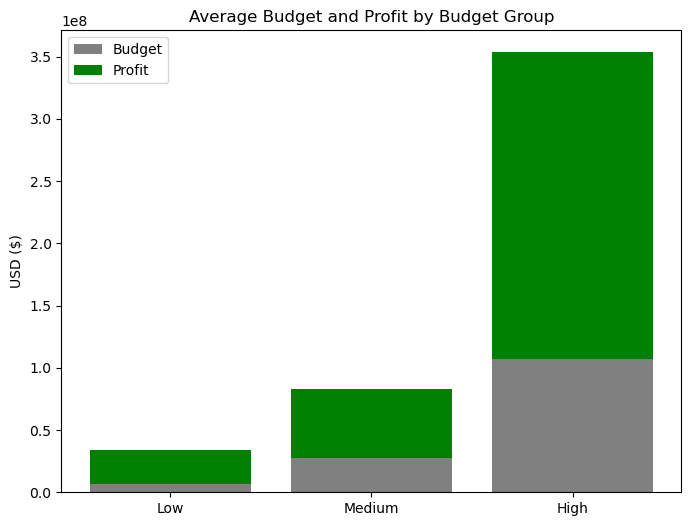

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

group_stats = df.groupby("budget_group").agg(
    avg_budget=("budget","mean"),
    avg_profit=("profit","mean")
)

plt.figure(figsize=(8,6))
plt.bar(group_stats.index, group_stats["avg_budget"], label="Budget", color="gray")
plt.bar(group_stats.index, group_stats["avg_profit"], bottom=group_stats["avg_budget"], label="Profit", color="green")

plt.title("Average Budget and Profit by Budget Group")
plt.ylabel("USD ($)")
plt.legend()
plt.show()


In [23]:
# Create budget groups directly from df
df["budget_group"] = pd.qcut(df["budget"], 3, labels=["Low", "Medium", "High"])

# Get the bin ranges
_, bins = pd.qcut(df["budget"], 3, retbins=True, labels=["Low","Medium","High"])

print("Budget group ranges, average profits, and ROI:")
for label, lower, upper in zip(["Low","Medium","High"], bins[:-1], bins[1:]):
    group_data = df[df["budget_group"]==label]
    
    avg_profit = group_data["profit"].mean()
    avg_roi = (group_data["profit"] / group_data["budget"]).mean()
    
    print(f"{label:6} : {lower:,.0f} – {upper:,.0f} | "
          f"Avg Profit = {avg_profit:,.0f} | "
          f"Avg ROI = {avg_roi:.2f}")


Budget group ranges, average profits, and ROI:
Low    : 10,000 – 15,000,000 | Avg Profit = 26,709,568 | Avg ROI = 7.14
Medium : 15,000,000 – 42,000,000 | Avg Profit = 54,887,686 | Avg ROI = 2.07
High   : 42,000,000 – 410,600,000 | Avg Profit = 246,318,166 | Avg ROI = 2.14


Low-budget movies → higher ROI (more efficient, but smaller absolute profits).

High-budget movies → much larger profits, but lower ROI (riskier, needs more upfront investment).

Medium → usually in-between.

In [24]:
# List movies in each budget category
# Show only first 20 movies per budget group
for label in ["Low", "Medium", "High"]:
    movies = (
        df[df["budget_group"]==label][["movie","budget","profit"]]
        .sort_values("budget")
        .head(20)
    )
    print(f"\n {label} Budget Movies (first 20):")
    print(movies.to_string(index=False))



 Low Budget Movies (first 20):
                movie  budget   profit
                 Cure   10000    84596
               Exeter   25000   464792
         A True Story   45000   -45000
           The Signal   50000   356299
        Bending Steel   50000   -50000
             Absentia   70000   -61445
Indie Game: The Movie  100000  -100000
        Cheap Thrills  100000   -40576
        A Ghost Story  100000  2669782
          The Gallows  100000 41556474
          The Gallows  100000 41556474
The Birth of a Nation  110000 10890000
 Your Sister's Sister  120000  2970593
    Sound of My Voice  135000   294448
          The Calling  160000  -127908
          The Calling  160000  -127908
        Another Earth  175000  1927779
              Weekend  190000  1387585
         Side Effects  200000  -155299
        The Overnight  200000   965996

 Medium Budget Movies (first 20):
                  movie   budget    profit
             Second Act 15700000  47588854
                  Vamps 1600

In [25]:
# Count genres per budget group
genre_counts = df.groupby(["budget_group","genres"]).size().reset_index(name="count")

print("\n Top 5 Genres in Each Budget Group:")
for label in ["Low", "Medium", "High"]:
    top_genres = genre_counts[genre_counts["budget_group"]==label].nlargest(5, "count")
    print(f"\n{label} Budget:")
    print(top_genres[["genres","count"]].to_string(index=False))

/tmp/ipykernel_18161/695867873.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_counts = df.groupby(["budget_group","genres"]).size().reset_index(name="count")



 Top 5 Genres in Each Budget Group:

Low Budget:
                 genres  count
   Comedy,Drama,Romance     39
                  Drama     33
Horror,Mystery,Thriller     29
           Comedy,Drama     28
        Horror,Thriller     28

Medium Budget:
              genres  count
      Comedy,Romance     26
  Action,Crime,Drama     24
              Comedy     21
        Comedy,Drama     21
Comedy,Drama,Romance     18

High Budget:
                    genres  count
Adventure,Animation,Comedy     63
   Action,Adventure,Sci-Fi     52
  Action,Adventure,Fantasy     33
    Action,Adventure,Drama     24
   Action,Adventure,Comedy     20


#High-budget movies generate the largest absolute profits, but they also carry higher financial risk since ROI is lower
Low-budget movies have higher ROI (they make more per dollar invested), but profits are smaller in absolute terms.
Medium-budget movies fall in between, but results can be mixed.

👉 Recommendation:
A portfolio mix approach (mix of low and high) reduces risk while capturing upside potential.

#Popularity vs. Profitability

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

#We use correlation to compare the above(linear relationship)

# Ensure popularity is numeric
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")

# Correlation test
corr, p_val = stats.pearsonr(pop_df["popularity"], pop_df["profit"])
print(f"Correlation = {corr:.3f}, p-value = {p_val:.3g}")

if p_val < 0.05:
    print("✅ Significant relationship between popularity and profitability (95% confidence).")
else:
    print("❌ No significant relationship between popularity and profitability.")


In [ ]:
#Regression
X = sm.add_constant(pop_df["popularity"])   # predictor
y = pop_df["profit"]                        # outcome

model = sm.OLS(y, X).fit()
print(model.summary())

Dep. Variable: profit
→ The dependent (outcome) variable being predicted is profit.

R-squared: 0.288
→ About 28.8% of the variation in profit can be explained by the predictor(s) in the model. This is a moderate fit.

Adj. R-squared: 0.288
→ Adjusted R² corrects for the number of predictors. Since it’s the same as R², you only had one independent variable (so no penalty adjustment).

Model: OLS (Ordinary Least Squares)
→ The regression technique used.

Method: Least Squares
→ Coefficients are estimated by minimizing squared errors.

F-statistic: 668.9
→ Tests whether the model as a whole is statistically significant. A large F means at least one predictor is strongly related to profit.

Prob (F-statistic): 4.20e-124
→ p-value of the F-test. This is extremely small (≈ 0), so the model is statistically significant overall.

Log-Likelihood: -33699.
→ Measure of model likelihood. Used in comparing models (higher = better).

No. Observations: 1652
→ Number of movies (data points).

Df Residuals: 1650
→ Degrees of freedom left after fitting model = 1652 observations − 2 parameters (const + popularity).

Df Model: 1
→ Number of predictors (just popularity).

AIC: 6.740e+04 | BIC: 6.741e+04
→ Information criteria used for model comparison (lower = better).

Covariance Type: nonrobust
→ Standard errors are not adjusted for heteroskedasticity.

Coefficients Table

const (Intercept): -9.072e+07
→ When popularity = 0, expected profit is –90.72 million (a loss).
→ Negative intercept makes sense because movies with no popularity would lose money.

popularity: 1.449e+07
→ For every 1-unit increase in popularity score, profit increases by about 14.49 million units (statistically significant).

std err (popularity = 5.6e+05)
→ Standard error of the coefficient estimate (measure of precision).

t (25.864)
→ t-statistic for testing if coefficient = 0. Large positive value → strong evidence popularity matters.

P>|t| (0.000)
→ p-value. Since <0.05, the effect is statistically significant.

[0.025, 0.975] (1.34e+07, 1.56e+07)
→ 95% confidence interval: the true effect of popularity on profit is between 13.4M and 15.6M.

Model Diagnostics

Omnibus: 1010.109 | Prob(Omnibus): 0.000
→ Test for normality of residuals. p=0 means residuals are not normally distributed.

Jarque-Bera (JB): 13814.248 | Prob(JB): 0.000
→ Another test for normality, confirming residuals are skewed/heavy-tailed.

Skew: 2.632
→ Residuals are positively skewed (long right tail).

Kurtosis: 16.152
→ Residuals are very peaked (heavy tails). Normal distribution has kurtosis ≈ 3, so this is much higher.

Durbin-Watson: 1.733
→ Tests autocorrelation of residuals. Values near 2 mean no autocorrelation. 1.73 is okay (slight positive autocorrelation, but not severe).

Cond. No.: 32.2
→ Condition number tests multicollinearity. 32 is low → no multicollinearity problem.

In [31]:
# Create popularity groups (3 groups: Low, Medium, High)
pop_df["popularity_group"] = pd.qcut(pop_df["popularity"], 3, labels=["Low","Medium","High"])

# Compute mean profits for each popularity group
group_means = pop_df.groupby("popularity_group")["profit"].mean()

# Plot
group_means.plot(kind="bar", color="skyblue", figsize=(8,6))
plt.title("Average Profitability by Popularity Group")
plt.ylabel("Average Profit")
plt.xlabel("Popularity Group")
plt.axhline(0, color="red", linestyle="--")
plt.show()

NameError: name 'pop_df' is not defined

In [ ]:
# Top 10 genres by average popularity
top_genres = (
    df.groupby("genres")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Popular Genres:")
print(top_genres)

In [ ]:
# Ensure budget groups are defined
df["budget_group"] = pd.qcut(df["budget"], 3, labels=["Low", "Medium", "High"])

# Top 10 movies per budget group by popularity
for label in ["Low", "Medium", "High"]:
    top_movies = (
        df[df["budget_group"]==label][["movie","genres","popularity","profit"]]
        .sort_values("popularity", ascending=False)
        .head(10)
    )
    print(f"\n Top 10 Popular Movies in {label} Budget Category:")
    print(top_movies.to_string(index=False))

In [ ]:
# Make sure profit is defined
df["profit"] = df["gross"] - df["budget"]

# Top 10 profitable movies sorted by popularity
top_profitable_popular = (
    df.sort_values(["profit","popularity"], ascending=[False,False])
    [["movie","genres","budget","profit","popularity"]]
    .head(10)
)

print("🎬 Top 10 Most Profitable Movies by Popularity:")
print(top_profitable_popular.to_string(index=False))